# <h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:coral;border:20px;color:white'> **Technocolabs Internship Project - 2:**<h2>
# <h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:coral;border:20px;color:white'>**"Startup-Acquisition-Status-Modeling-Using-Machine-Learning-Pipeline"** <h2>
# <h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:coral;border:20px;color:white'>**Interns: Team - C Members** <h2>
    


# **Task # 1: Data Preprocessing**

In [1]:
# @title Libraries

import numpy as np # Linear algebra
import pandas as pd # Data processing

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression

# Decision Tree - Binary Classification model building
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# SVM Model - Binary Classification model building
from sklearn.svm import SVC

# XGBoost - Multiclass Classification model building
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

# Random Forest - Multiclass Classification model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Multinomial Naive Bayes - Multiclass Classification model building
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# Gradient Boosting -  Multiclass Classification model building
from sklearn.ensemble import GradientBoostingClassifier

# Display Images/GIF
from IPython.display import Image

#warning hadle
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
# @title  File Paths 📂:

# Specify the path to your CSV file

# Read the CSV file into a DataFrame
comp_df = pd.read_csv("D:\\technocalobs\\2nd project\\2 task\\Data_companies\\companies.csv")

# Explore the first 5 rows
comp_df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [3]:
# @title Summary Statistics Test
comp_df.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [4]:
# @title Column Names
comp_df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [5]:
# @title Column Information
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196530 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

## A. Data Cleaning
    1. Delete irrelevant & redundant information.
    2. Remove noise or unreliable data (missing values).

### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at',
     'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',
     'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.

### 2. Remove noise or unreliable data (missing values)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.


In [6]:
# @title 1.a. Delete 'region', 'city', 'state_code' as they provide too much of granularity.

# Modifies the DataFrame in place and deleting the mentioned columns from dataset
comp_df.drop(['region','city','state_code'], axis=1, inplace=True)

In [7]:
# @title 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

# Modifies the DataFrame in place and deleting the mentioned columns from dataset
comp_df.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at', 'closed_at'], axis=1, inplace=True)

In [8]:
# @title 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview', 'tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

# Modifies the DataFrame in place and deleting the mentioned columns from dataset
comp_df.drop(['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description',
            'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink','invested_companies'], axis=1,inplace=True)

In [9]:
# @title 1.d. Delete duplicate values if found any

# Check for Duplicate values in dataset
comp_df.duplicated().sum()

87105

In [10]:
# Deleting all duplicating values from dataset
comp_df = comp_df.drop_duplicates()

In [11]:
# check if any left
comp_df.duplicated().sum()

0

In [12]:
# @title 1.e. Delete those which has more than 98% of null values.

# missing values in decsending order
print("Dataset \n")
print("In Numbers \n\n", comp_df.isnull().sum().sort_values(ascending=True),"\n" )
print("In Percentage % \n\n", comp_df.isnull().sum()/comp_df.shape[0]*100)

Dataset 

In Numbers 

 status                      0
category_code           12225
country_code            24854
founded_at              26899
lat                     28347
lng                     28347
relationships           34395
milestones              53340
last_milestone_at       53340
first_milestone_at      53340
funding_rounds          77779
last_funding_at         77978
first_funding_at        77978
funding_total_usd       81587
investment_rounds      107197
last_investment_at     107201
first_investment_at    107201
ROI                    108722
dtype: int64 

In Percentage % 

 category_code          11.169688
status                  0.000000
founded_at             24.576968
country_code           22.708501
first_investment_at    97.946970
last_investment_at     97.946970
investment_rounds      97.943316
first_funding_at       71.246619
last_funding_at        71.246619
funding_rounds         71.064798
funding_total_usd      74.544076
first_milestone_at     48.735473
last_m

In [13]:
# Deleting all those columns with more than 98% null values
comp_df.drop(columns=["ROI"], inplace=True)


2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [14]:
# @title Drop instances with missing values in the specified columns

columns_to_check = ['status', 'country_code', 'category_code', 'founded_at']
comp_df.dropna(subset=columns_to_check, inplace=True)


In [15]:
# @title Drop the time-based columns from the DataFrame

# Define the list of time-based columns to drop because our task is not about the time series analysis
time_based_columns = ['first_investment_at', 'last_investment_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at']
comp_df.drop(columns=time_based_columns, inplace=True)



In [16]:
# @title Imputing missing values using mean() method for this numerical data in dataset.

numerical_columns = ['investment_rounds', 'funding_rounds', 'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng']
for col in numerical_columns:
    comp_df[col].fillna(comp_df[col].mean(), inplace=True)

comp_df.head()


,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,USA,4.75968,3.000000,3.975000e+07,5.000000,17.000000,47.606209,-122.332071
5,advertising,operating,2007-06-27,MAR,4.75968,1.805758,1.582132e+07,1.415929,2.000000,30.427755,-9.598107
6,cleantech,operating,2008-08-20,IND,4.75968,1.805758,1.582132e+07,1.415929,4.443607,22.307159,73.181219
12,advertising,operating,2008-08-01,USA,4.75968,1.805758,1.582132e+07,1.000000,2.000000,35.686975,-105.937799
13,web,acquired,2007-10-01,USA,4.75968,1.000000,5.000000e+06,3.000000,14.000000,37.386052,-122.083851


In [17]:
# @title Re - checking for null values

comp_df.isnull().sum()

category_code        0
status               0
founded_at           0
country_code         0
investment_rounds    0
funding_rounds       0
funding_total_usd    0
milestones           0
relationships        0
lat                  0
lng                  0
dtype: int64

In [18]:
# @title Concise summary information about the DataFrame

comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63585 entries, 0 to 196552
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category_code      63585 non-null  object 
 1   status             63585 non-null  object 
 2   founded_at         63585 non-null  object 
 3   country_code       63585 non-null  object 
 4   investment_rounds  63585 non-null  float64
 5   funding_rounds     63585 non-null  float64
 6   funding_total_usd  63585 non-null  float64
 7   milestones         63585 non-null  float64
 8   relationships      63585 non-null  float64
 9   lat                63585 non-null  float64
 10  lng                63585 non-null  float64
dtypes: float64(7), object(4)
memory usage: 5.8+ MB


Now we have seen using the .info() method thet we have filled succesfully all mising the missing data.

# **Task # 2: Exploratory Data Analysis (EDA) 📊:**

    1. Univariate Analysis.
    2. Bivariate Analysis
    3. Multivariate Analysis


In [19]:
# @title Let's check comp_df first
comp_df.head()

,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,USA,4.75968,3.000000,3.975000e+07,5.000000,17.000000,47.606209,-122.332071
5,advertising,operating,2007-06-27,MAR,4.75968,1.805758,1.582132e+07,1.415929,2.000000,30.427755,-9.598107
6,cleantech,operating,2008-08-20,IND,4.75968,1.805758,1.582132e+07,1.415929,4.443607,22.307159,73.181219
12,advertising,operating,2008-08-01,USA,4.75968,1.805758,1.582132e+07,1.000000,2.000000,35.686975,-105.937799
13,web,acquired,2007-10-01,USA,4.75968,1.000000,5.000000e+06,3.000000,14.000000,37.386052,-122.083851


# Univariate Analysis

In [20]:
# @title  Descriptive statistics for numerical columns in df

comp_df.describe()

,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
count,63585.000000,63585.000000,6.358500e+04,63585.000000,63585.000000,63585.000000,63585.000000
mean,4.759680,1.805758,1.582132e+07,1.415929,4.443607,37.294084,-50.715469
std,2.423232,0.786445,3.966092e+07,0.549882,11.563120,15.515049,69.444700
min,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.485278
25%,4.759680,1.805758,1.450000e+07,1.000000,2.000000,34.052234,-111.720761
50%,4.759680,1.805758,1.582132e+07,1.415929,3.000000,38.982228,-74.330084
75%,4.759680,1.805758,1.582132e+07,1.415929,4.443607,44.786568,0.121817
max,478.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.165130


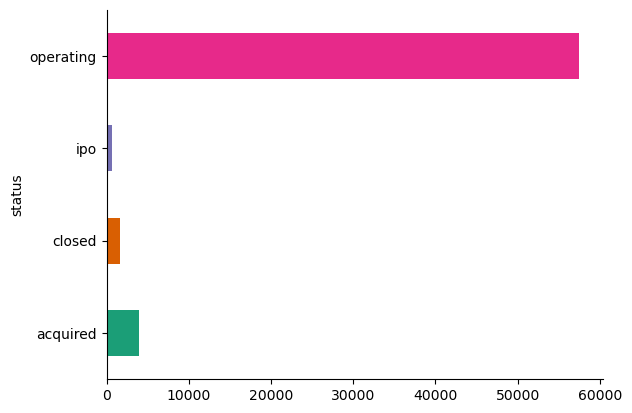

In [21]:
# @title Visualization of Status - Column (Target Variable)

comp_df.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

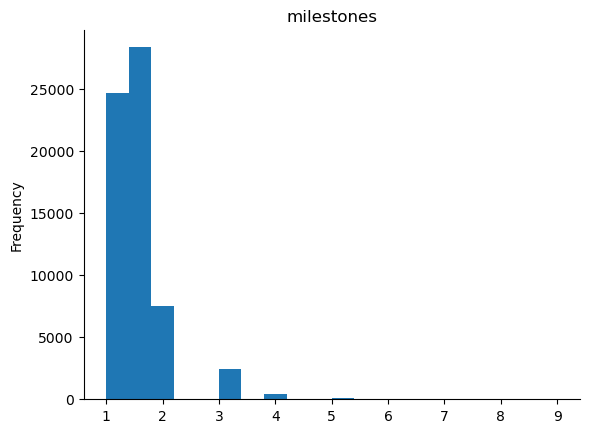

In [22]:
# @title Visualization of Milestones - Column

comp_df['milestones'].plot(kind='hist', bins=20, title='milestones')
plt.gca().spines[['top', 'right',]].set_visible(False)

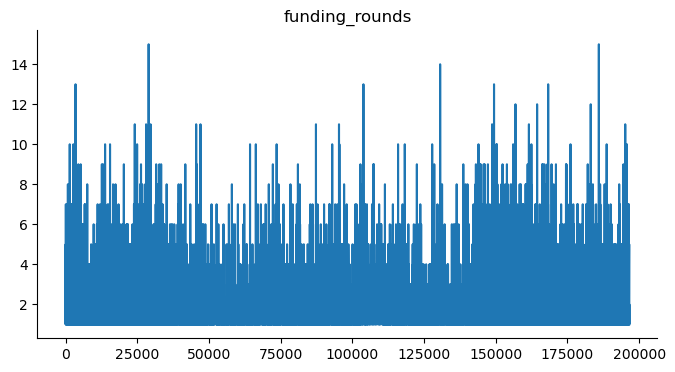

In [23]:
# @title Visualization of Funding_rounds - Column

comp_df['funding_rounds'].plot(kind='line', figsize=(8, 4), title='funding_rounds')
plt.gca().spines[['top', 'right']].set_visible(False)

# Bivariate Analysis

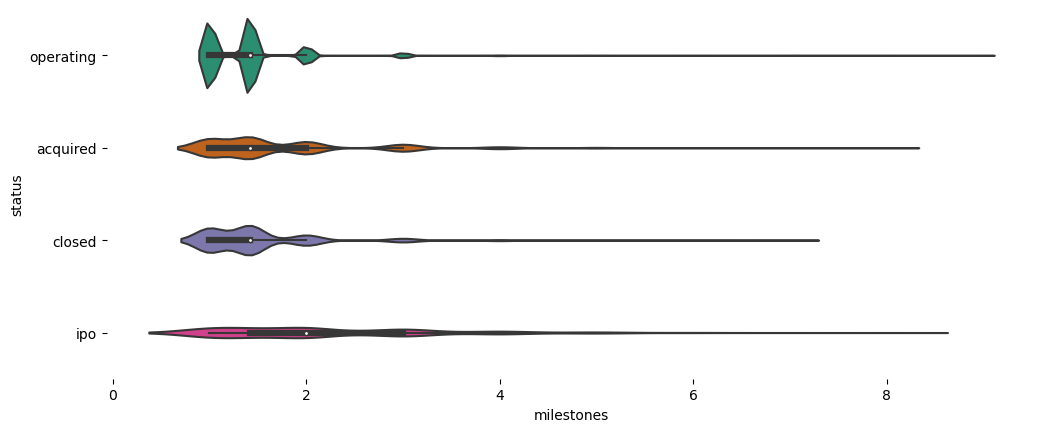

In [24]:
# @title Visalization of Status vs Milestones

figsize = (12, 1.2 * len(comp_df['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data=comp_df, x='milestones', y='status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

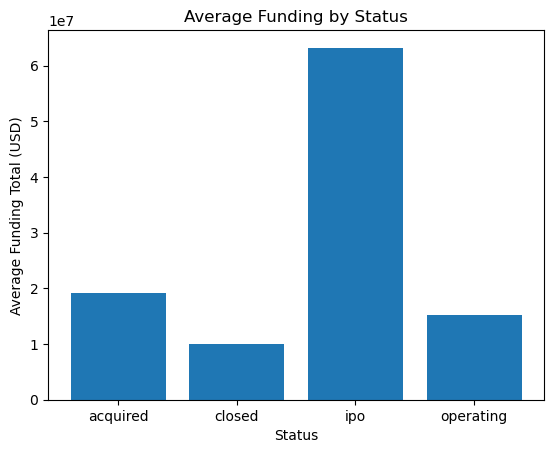

In [25]:
# @title Visualization of Avg Funding by Status

# Group the data by status and calculate the average funding total
grouped_data = comp_df.groupby('status')['funding_total_usd'].mean()

# Create a bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Status')
plt.ylabel('Average Funding Total (USD)')
_ = plt.title('Average Funding by Status')


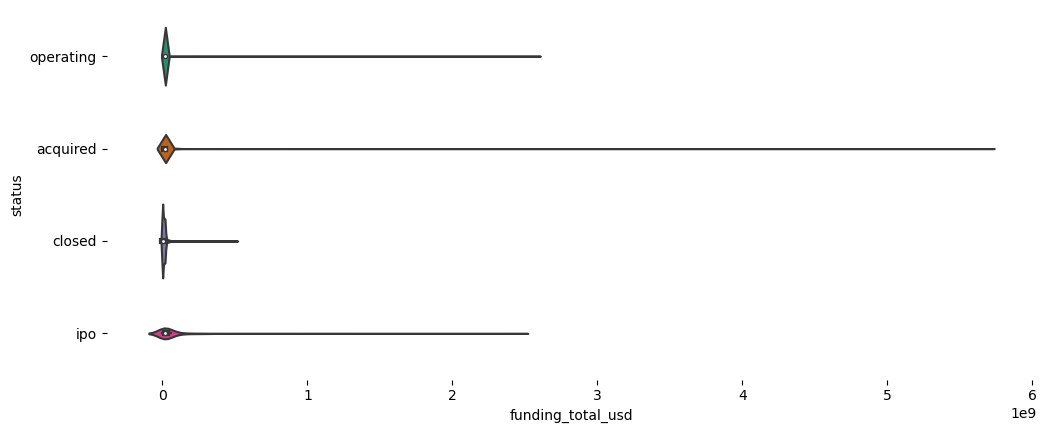

In [26]:
# @title Visualization of Status vs Funding_total_usd

figsize = (12, 1.2 * len(comp_df['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(comp_df, x='funding_total_usd', y='status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: xlabel='category_code'>

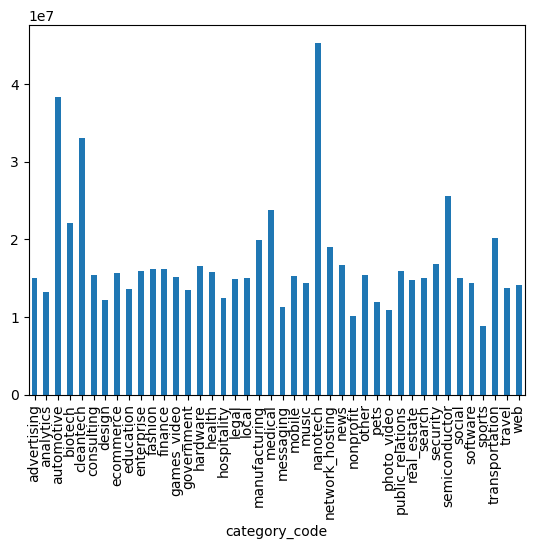

In [27]:
# @title Visualiztion of Average_funding_amount by Category_code

comp_df.groupby('category_code')['funding_total_usd'].mean().plot(kind='bar')

# **Task # 3: Feature Engineering:**

    1. Feature Selection
    2. Creation of New Features
    3. Normalization and Scaling:
    4. Encoding Categorical Variables
    5. Feature Engineering Documentation

In [28]:
# @title Let's check comp_df first
comp_df.head()

,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,USA,4.75968,3.000000,3.975000e+07,5.000000,17.000000,47.606209,-122.332071
5,advertising,operating,2007-06-27,MAR,4.75968,1.805758,1.582132e+07,1.415929,2.000000,30.427755,-9.598107
6,cleantech,operating,2008-08-20,IND,4.75968,1.805758,1.582132e+07,1.415929,4.443607,22.307159,73.181219
12,advertising,operating,2008-08-01,USA,4.75968,1.805758,1.582132e+07,1.000000,2.000000,35.686975,-105.937799
13,web,acquired,2007-10-01,USA,4.75968,1.000000,5.000000e+06,3.000000,14.000000,37.386052,-122.083851


In [29]:
# @title Checking Rows and Columns
rows, columns = comp_df.shape

print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 63585
Number of columns: 11


In [30]:
# @title Creation of New Features from Dataset

# Convert 'founded_at' column to datetime format
comp_df['founded_at'] = pd.to_datetime(comp_df['founded_at'])

# Extract year from 'founded_at' column
comp_df['founded_at'] = comp_df['founded_at'].dt.year

comp_df.head()

,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005,USA,4.75968,3.000000,3.975000e+07,5.000000,17.000000,47.606209,-122.332071
5,advertising,operating,2007,MAR,4.75968,1.805758,1.582132e+07,1.415929,2.000000,30.427755,-9.598107
6,cleantech,operating,2008,IND,4.75968,1.805758,1.582132e+07,1.415929,4.443607,22.307159,73.181219
12,advertising,operating,2008,USA,4.75968,1.805758,1.582132e+07,1.000000,2.000000,35.686975,-105.937799
13,web,acquired,2007,USA,4.75968,1.000000,5.000000e+06,3.000000,14.000000,37.386052,-122.083851


In [31]:
# @title Creating a dictionary to map status values to isClosed values
status_mapping = {'operating': 1, 'ipo': 1, 'acquired': 0, 'closed': 0}

# Map status values to isClosed values and create the new column
comp_df['isClosed'] = comp_df['status'].map(status_mapping)

# Display the updated DataFrame
comp_df.head()


,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed
0,web,operating,2005,USA,4.75968,3.000000,3.975000e+07,5.000000,17.000000,47.606209,-122.332071,1
5,advertising,operating,2007,MAR,4.75968,1.805758,1.582132e+07,1.415929,2.000000,30.427755,-9.598107,1
6,cleantech,operating,2008,IND,4.75968,1.805758,1.582132e+07,1.415929,4.443607,22.307159,73.181219,1
12,advertising,operating,2008,USA,4.75968,1.805758,1.582132e+07,1.000000,2.000000,35.686975,-105.937799,1
13,web,acquired,2007,USA,4.75968,1.000000,5.000000e+06,3.000000,14.000000,37.386052,-122.083851,0


In [32]:
# @title Normalization (Min-Max Scaling)


# Select the numerical features for normalization
numerical_features = ['investment_rounds', 'funding_rounds', 'funding_total_usd',
                      'milestones', 'relationships', 'lat', 'lng']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max scaling on the selected features
comp_df[numerical_features] = scaler.fit_transform(comp_df[numerical_features])

comp_df.head()


,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed
0,web,operating,2005,USA,0.007882,0.142857,0.006974,0.500000,0.013468,0.766939,0.110690,1
5,advertising,operating,2007,MAR,0.007882,0.057554,0.002776,0.051991,0.000842,0.633250,0.446557,1
6,cleantech,operating,2008,IND,0.007882,0.057554,0.002776,0.051991,0.002899,0.570053,0.693181,1
12,advertising,operating,2008,USA,0.007882,0.057554,0.002776,0.000000,0.000842,0.674179,0.159533,1
13,web,acquired,2007,USA,0.007882,0.000000,0.000877,0.250000,0.010943,0.687402,0.111430,0


## Encoding Categorical Variables
    1. All Ordinal variables will be Label encoded - Order matter.
    2. All Nominal variables will be One Hot encoded - Order does not matter.
    

In [33]:
# @title One-Hot Encoding - Country_Code Column

num_countries = comp_df['country_code'].nunique()
print("Number of unique countries:", num_countries)


Number of unique countries: 165


In [34]:
# First, replace country codes not in the top 10 with 'Other'
top_countries = comp_df['country_code'].value_counts().head(10).index.tolist()
comp_df['country_code'] = comp_df['country_code'].apply(lambda x: x if x in top_countries else 'Other')

# Perform one-hot encoding for 'country_code'
comp_df = pd.get_dummies(comp_df, columns=['country_code'], prefix='country')


In [35]:
comp_df.columns

Index(['category_code', 'status', 'founded_at', 'investment_rounds',
       'funding_rounds', 'funding_total_usd', 'milestones', 'relationships',
       'lat', 'lng', 'isClosed', 'country_AUS', 'country_CAN', 'country_DEU',
       'country_ESP', 'country_FRA', 'country_GBR', 'country_IND',
       'country_ISR', 'country_NLD', 'country_Other', 'country_USA'],
      dtype='object')

In [36]:
# @title One-Hot Encoding - Category_Code Column

# there are only 11 unique categories in the category_code , let's apply direct one hot encode technique on
num_categories = comp_df['category_code'].nunique()
print("Number of unique categories:", num_categories)


Number of unique categories: 42


In [37]:
# @title Keeping first 10 records

# Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name

# First, replace category codes not in the top 10 with 'Other'
top_categories = comp_df['category_code'].value_counts().head(10).index.tolist()
comp_df['category_code'] = comp_df['category_code'].apply(lambda x: x if x in top_categories else 'Other')

# Perform one-hot encoding for 'category_code'
comp_df = pd.get_dummies(comp_df, columns=['category_code'], prefix='category')


In [38]:
comp_df.columns

Index(['status', 'founded_at', 'investment_rounds', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng',
       'isClosed', 'country_AUS', 'country_CAN', 'country_DEU', 'country_ESP',
       'country_FRA', 'country_GBR', 'country_IND', 'country_ISR',
       'country_NLD', 'country_Other', 'country_USA', 'category_Other',
       'category_advertising', 'category_biotech', 'category_consulting',
       'category_ecommerce', 'category_enterprise', 'category_games_video',
       'category_mobile', 'category_other', 'category_software',
       'category_web'],
      dtype='object')

In [39]:
# @title Label Endoded - Status Column for Binary Model

# Copy the DataFrame before modifying the 'status' column
mclf_df = comp_df.copy()

# Apply the lambda function to update the 'status' column for binary classification
comp_df['status'] = comp_df['status'].apply(lambda x: 0 if (x == 'operating' or x == 'ipo') else 1 )


In [40]:
# Check the total values in target variable

num_status = comp_df['status'].nunique()
print("Number of unique status:", num_status)

Number of unique status: 2


In [41]:
comp_df.head()

,status,founded_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,...,category_advertising,category_biotech,category_consulting,category_ecommerce,category_enterprise,category_games_video,category_mobile,category_other,category_software,category_web
0,0,2005,0.007882,0.142857,0.006974,0.500000,0.013468,0.766939,0.110690,1,...,False,False,False,False,False,False,False,False,False,True
5,0,2007,0.007882,0.057554,0.002776,0.051991,0.000842,0.633250,0.446557,1,...,True,False,False,False,False,False,False,False,False,False
6,0,2008,0.007882,0.057554,0.002776,0.051991,0.002899,0.570053,0.693181,1,...,False,False,False,False,False,False,False,False,False,False
12,0,2008,0.007882,0.057554,0.002776,0.000000,0.000842,0.674179,0.159533,1,...,True,False,False,False,False,False,False,False,False,False
13,1,2007,0.007882,0.000000,0.000877,0.250000,0.010943,0.687402,0.111430,0,...,False,False,False,False,False,False,False,False,False,True


In [42]:
# @title Feature Selection using Mutual Information (MI)

# Extract the target variable (Y)
y = comp_df['status']

# Drop the target variable from the DataFrame to get the feature matrix (X)
X = comp_df.drop(columns=['status'])

# Compute mutual information between features and target
mi_scores = mutual_info_regression(X, y)

# Create a DataFrame to store feature names and their mutual information scores
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort features based on mutual information scores (descending order)
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Display the top-ranked features
print(mi_scores_df.head(10))


              Feature  MI Score
8            isClosed  0.290410
0          founded_at  0.021696
2      funding_rounds  0.015325
3   funding_total_usd  0.014699
6                 lat  0.013049
4          milestones  0.008588
7                 lng  0.006387
5       relationships  0.005945
17        country_NLD  0.005529
12        country_ESP  0.005057


## Summary of Feature Engineering:


After conducting comprehensive feature engineering, my dataset Comp_df has undergone significant transformations. Initially containing 11 columns consisting of 3 categorical variables and 8 numerical variables, it has now expanded to encompass 32 columns while maintaining its original 4682 rows. All variables within Comp_df have been converted to numerical format, making them suitable for analytical operations. My df is ready to embark on the next phase of model construction with confidence.



# create Pipeline

pipe1 - without scaling data


pipe2 - with scaling data

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [44]:
pd.set_option('display.max_columns', None)

In [45]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [46]:
company = pd.read_csv('final_company')

In [47]:
X = company.drop("isClosed", axis=1)
y = company["isClosed"]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle = True, 
                                                    test_size=0.2)

In [49]:
X_train

,category_code,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
6788,advertising,2008,USA,2007,2008,2.0,8300000.0,2008,2011,4.0,13.0,21.306944,-157.858333
8446,software,2006,ESP,2007,2007,1.0,4270000.0,2012,2012,1.0,2.0,40.416775,-3.703790
4123,advertising,2011,AUS,2011,2011,1.0,6000.0,2011,2011,1.0,2.0,-37.852000,144.998000
1642,software,2004,USA,2011,2012,3.0,3928230.0,2011,2011,1.0,4.0,37.354108,-121.955236
8022,enterprise,2008,USA,2010,2010,1.0,11000000.0,2011,2012,2.0,12.0,37.322998,-122.032182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,hardware,2006,USA,2011,2013,2.0,5800000.0,2013,2013,1.0,3.0,34.075376,-84.294090
11799,advertising,2010,IND,2011,2012,2.0,7000000.0,2013,2013,2.0,13.0,19.075984,72.877656
7791,other,2001,USA,2005,2010,3.0,17199997.0,2012,2012,1.0,21.0,35.085334,-106.605553
2547,other,2011,other,2011,2011,1.0,20000.0,2011,2011,1.0,2.0,53.904540,27.561524


In [51]:
trf1 = ColumnTransformer([
    ('ohe_category', OneHotEncoder(handle_unknown='ignore', drop='first'), [0]),
    ('ohe_country', OneHotEncoder(handle_unknown='ignore', drop='first'), [2])
], remainder='passthrough')

In [52]:
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_category',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 [0]),
                                ('ohe_country',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 [2])])

In [53]:
first_step = trf1.fit_transform(X_train)

In [54]:
pd.DataFrame(trf1.fit_transform(X_train)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2008.0,2007.0,2008.0,2.0,8300000.0,2008.0,2011.0,4.0,13.0,21.306944,-157.858333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2006.0,2007.0,2007.0,1.0,4270000.0,2012.0,2012.0,1.0,2.0,40.416775,-3.703790
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0,2011.0,2011.0,1.0,6000.0,2011.0,2011.0,1.0,2.0,-37.852000,144.998000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2004.0,2011.0,2012.0,3.0,3928230.0,2011.0,2011.0,1.0,4.0,37.354108,-121.955236
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2008.0,2010.0,2010.0,1.0,11000000.0,2011.0,2012.0,2.0,12.0,37.322998,-122.032182


In [55]:
trf3 = xgb.XGBClassifier()

In [56]:
trf4= RandomForestClassifier()

In [57]:
trf5 = LogisticRegression()

In [58]:
trf6 = SVC()

In [59]:
from imblearn.pipeline import Pipeline
pipe1 = Pipeline([
    ('OHE',trf1),
    ('smote', SMOTE(random_state=11)),
#     ('XG BOOST',trf3)
#     ('Random Forest', trf4)
#     ('Logistic Regression', trf5)
    ('SVM', trf6)
])

In [61]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('OHE',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_category',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [0]),
                                                 ('ohe_country',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [2])])),
                ('smote', SMOTE(random_state=11)), ('SVM', SVC())])

In [62]:
y_pred = pipe1.predict(X_train)


In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

[[5794 2496]
 [ 940  631]]
0.6515566372578846
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      8290
           1       0.20      0.40      0.27      1571

    accuracy                           0.65      9861
   macro avg       0.53      0.55      0.52      9861
weighted avg       0.76      0.65      0.69      9861



In [64]:
y_pred = pipe1.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1459  614]
 [ 255  138]]
0.6476074614760746
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      2073
           1       0.18      0.35      0.24       393

    accuracy                           0.65      2466
   macro avg       0.52      0.53      0.51      2466
weighted avg       0.74      0.65      0.69      2466



pipe2


In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [67]:
company = pd.read_csv('final_company')

In [68]:
X = company.drop("isClosed", axis=1)
y = company["isClosed"]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle = True, 
                                                    test_size=0.2)

In [71]:
# one hot encoding

trf1 = ColumnTransformer([
    ('ohe_category', OneHotEncoder(handle_unknown='ignore', drop='first'), [0]),
    ('ohe_country', OneHotEncoder(handle_unknown='ignore', drop='first'), [2])
], remainder='passthrough')


In [72]:
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_category',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 [0]),
                                ('ohe_country',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 [2])])

In [73]:
first_step = trf1.fit_transform(X_train)


In [74]:
pd.DataFrame(trf1.fit_transform(X_train)).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1999.0,2006.0,2006.0,1.0,10000000.0,2005.0,2005.0,1.0,1.0,37.354108,-121.955236
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,2010.0,2011.0,2.0,218000.0,2010.0,2010.0,1.0,4.0,47.606209,-122.332071
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2011.0,2011.0,2012.0,2.0,5800000.0,2012.0,2013.0,2.0,8.0,37.441883,-122.143019
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1983.0,2008.0,2009.0,2.0,40000000.0,2010.0,2013.0,2.0,2.0,37.413800,127.518300
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,2010.0,2013.0,3.0,5500000.0,2011.0,2012.0,2.0,3.0,33.854721,35.862285


In [75]:
# Scaling
trf2 = ColumnTransformer([
    ('scale',StandardScaler(),slice(23,35))
],remainder='passthrough')

In [76]:
trf2

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 slice(23, 35, None))])

In [77]:
second_step = trf2.fit_transform(first_step)

In [78]:
pd.DataFrame(trf2.fit_transform(first_step)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,-1.220791,-1.353392,-2.287442,-0.745783,-0.113863,-1.695722,-2.152746,-0.790093,-0.360700,-0.094856,-0.850207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.484603,0.098856,-0.037600,-0.080669,-0.223604,-0.043496,-0.369251,-0.790093,-0.193787,0.706297,-0.856272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.639639,0.461918,0.412368,-0.080669,-0.160981,0.617394,0.700846,0.299420,0.028764,-0.087997,-0.853229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-3.701363,-0.627268,-0.937537,-0.080669,0.222697,-0.043496,0.700846,0.299420,-0.305062,-0.090192,3.164597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.484603,0.098856,0.862337,0.584445,-0.164347,0.286949,0.344147,0.299420,-0.249425,-0.368317,1.689567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [79]:
from imblearn.pipeline import Pipeline
pipe2 = Pipeline([
    ('OHE',trf1),
    ('smote', SMOTE(random_state=11)),
    ('scaling', trf2),
    ('Logistic Regression',trf5),
#     ('SVM',trf6)
])

In [80]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('OHE',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_category',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [0]),
                                                 ('ohe_country',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [2])])),
                ('smote', SMOTE(random_state=11)),
                ('scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  slice(23, 35, None))])),
                ('Logistic Regression', LogisticRegression())])

In [81]:
y_pred = pipe2.predict(X_train)

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

[[6547 1743]
 [ 468 1103]]
0.7757833891086097
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      8290
           1       0.39      0.70      0.50      1571

    accuracy                           0.78      9861
   macro avg       0.66      0.75      0.68      9861
weighted avg       0.85      0.78      0.80      9861



In [83]:
y_pred = pipe2.predict(X_test)


In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1636  437]
 [ 107  286]]
0.7793998377939984
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      2073
           1       0.40      0.73      0.51       393

    accuracy                           0.78      2466
   macro avg       0.67      0.76      0.68      2466
weighted avg       0.85      0.78      0.80      2466



......................................................................................Thank You................................................................................................................